In [1]:
import pandas as pd

In [3]:
movie=pd.read_csv('movies.csv')

movie.shape()

In [5]:
movie.shape

(9742, 3)

In [7]:
rating=pd.read_csv('ratings.csv')

In [9]:
rating.shape

(100836, 4)

In [10]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [12]:
rating.userId.nunique()

610

In [13]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [14]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [16]:
m=rating.rating.max()

In [17]:
print(m)

5.0


In [19]:
max_ratings = rating.groupby('movieId')['rating'].max().reset_index()
print(max_ratings)

      movieId  rating
0           1     5.0
1           2     5.0
2           3     5.0
3           4     3.0
4           5     5.0
...       ...     ...
9719   193581     4.0
9720   193583     3.5
9721   193585     3.5
9722   193587     3.5
9723   193609     4.0

[9724 rows x 2 columns]


In [22]:
max_rating_row = rating[rating['rating'] == rating['rating'].max()]
print(max_rating_row)

        userId  movieId  rating   timestamp
3            1       47     5.0   964983815
4            1       50     5.0   964982931
6            1      101     5.0   964980868
8            1      151     5.0   964984041
9            1      157     5.0   964984100
...        ...      ...     ...         ...
100814     610   158238     5.0  1479545219
100829     610   164179     5.0  1493845631
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352

[13211 rows x 4 columns]


In [24]:
merged_df = pd.merge(rating, movie, on='movieId')

In [25]:
max_rating_row = merged_df[merged_df['rating'] == merged_df['rating'].max()]

In [28]:
print(max_rating_row[['movieId', 'title', 'rating']])

        movieId                                              title  rating
9             1                                   Toy Story (1995)     5.0
12            1                                   Toy Story (1995)     5.0
13            1                                   Toy Story (1995)     5.0
16            1                                   Toy Story (1995)     5.0
19            1                                   Toy Story (1995)     5.0
...         ...                                                ...     ...
100761    96832                                 Holy Motors (2012)     5.0
100773   100906                                Maniac Cop 2 (1990)     5.0
100787   107771                      Only Lovers Left Alive (2013)     5.0
100802   115727  Crippled Avengers (Can que) (Return of the 5 D...     5.0
100815   138632                                 Tokyo Tribe (2014)     5.0

[13211 rows x 3 columns]


In [30]:
dt = 'Matrix, The (1999)'
if dt in movie['title'].values:
    movie_details = movie[movie['title'] == dt]
    print("Details for the movie with title '{}' are:".format(dt))
    print(movie_details)
else:
    print("Movie with title '{}' not found in the dataset.".format(dt))

Details for the movie with title 'Matrix, The (1999)' are:
      movieId               title                  genres
1939     2571  Matrix, The (1999)  Action|Sci-Fi|Thriller


In [31]:
tags=pd.read_csv('tags.csv')

In [32]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [33]:
matrix_tags = tags[tags['movieId'].isin(movie[movie['title'] == dt]['movieId'])]

In [34]:
print("Tags for the movie '{}':".format(dt))

Tags for the movie 'Matrix, The (1999)':


In [35]:
print(matrix_tags[['userId', 'tag', 'timestamp']])

      userId                 tag   timestamp
815      424        martial arts  1457842912
816      424              sci-fi  1457842899
1646     474  alternate universe  1137204991
2794     537          philosophy  1424141098
2795     537    post apocalyptic  1424141101


In [36]:
dt2 = 'Terminator 2: Judgment Day (1991)'

In [37]:
terminator_ratings = rating[rating['movieId'].isin(movie[movie['title'] == dt2]['movieId'])]

In [38]:
average_rating = terminator_ratings['rating'].mean()

In [39]:
print("Average user rating for '{}': {:.2f}".format(dt2, average_rating))

Average user rating for 'Terminator 2: Judgment Day (1991)': 3.97


In [40]:
import matplotlib.pyplot as plt


In [41]:
dt3 = 'Fight Club (1999)'

In [43]:
fight_club_ratings = rating[rating['movieId'].isin(movie[movie['title'] == dt3]['movieId'])]

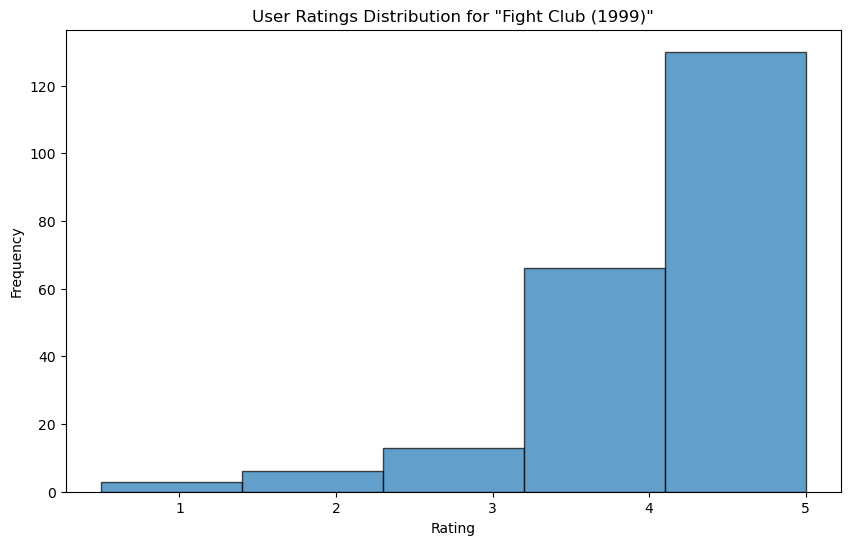

In [44]:
plt.figure(figsize=(10, 6))
plt.hist(fight_club_ratings['rating'], bins=5, edgecolor='black', alpha=0.7)
plt.title('User Ratings Distribution for "{}"'.format(dt3))
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [45]:
grouped_ratings = rating.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']

In [46]:
merged_df = pd.merge(movie, grouped_ratings, on='movieId', how='inner')

In [47]:
filtered_movies = merged_df[merged_df['rating_count'] > 50]

In [48]:
sorted_movies = filtered_movies.sort_values(by='rating_mean', ascending=False)

In [49]:
most_popular_movie = sorted_movies.iloc[0]
print("Most Popular Movie based on Average User Ratings:")
print(most_popular_movie[['movieId', 'title', 'rating_mean']])

Most Popular Movie based on Average User Ratings:
movieId                                     318
title          Shawshank Redemption, The (1994)
rating_mean                            4.429022
Name: 277, dtype: object


In [50]:
top_rated_movies = filtered_movies.sort_values(by='rating_count', ascending=False)

In [51]:
top_5_movies = top_rated_movies.head(5)
print("Top 5 Popular Movies based on Number of User Ratings:")
print(top_5_movies[['movieId', 'title', 'rating_count']])

Top 5 Popular Movies based on Number of User Ratings:
      movieId                             title  rating_count
314       356               Forrest Gump (1994)           329
277       318  Shawshank Redemption, The (1994)           317
257       296               Pulp Fiction (1994)           307
510       593  Silence of the Lambs, The (1991)           279
1938     2571                Matrix, The (1999)           278


In [53]:
sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi')]

In [54]:
sorted_sci_fi_movies = sci_fi_movies.sort_values(by='rating_count', ascending=False)

In [55]:
third_most_popular_sci_fi = sorted_sci_fi_movies.iloc[2]
print("Third Most Popular Sci-Fi Movie based on Number of User Ratings:")
print(third_most_popular_sci_fi[['movieId', 'title', 'rating_count']])

Third Most Popular Sci-Fi Movie based on Number of User Ratings:
movieId                          480
title           Jurassic Park (1993)
rating_count                     238
Name: 418, dtype: object


In [56]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = (response.text)
    imdb_rating = soup.find('span', attrs={'itemprop' : 'ratingValue'})
    return imdb_rating.text if imdb_rating else np.nan

In [57]:
links=pd.read_csv('links.csv')

In [58]:
merged_df = pd.merge(links, rating, on='movieId', how='inner')

In [59]:
popular_movies = merged_df.groupby('movieId').filter(lambda x: len(x) > 50)

In [60]:
imdb_ratings_dict = {}

In [63]:
sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi')]

In [64]:
max_imdb_movieId = max(imdb_ratings_dict, key=imdb_ratings_dict.get)

In [65]:
print(f"The movie with the highest IMDb rating is Movie ID: {max_imdb_movieId}")

The movie with the highest IMDb rating is Movie ID: 1


In [67]:
import requests
from bs4 import BeautifulSoup

# Merge 'links', 'ratings', and 'movies' DataFrames
merged_df = pd.merge(links, rating, on='movieId', how='inner')
merged_df = pd.merge(merged_df, movie, on='movieId', how='inner')

# Filter Sci-Fi movies
sci_fi_movies = merged_df[merged_df['genres'].str.contains('Sci-Fi')]

# Initialize a dictionary to store IMDb ratings
imdb_ratings_dict = {}

# Scraper function
def scraper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('span', attrs={'itemprop': 'ratingValue'})
    return imdb_rating.text if imdb_rating else np.nan

# Iterate over Sci-Fi movies
for _, row in sci_fi_movies.iterrows():
    imdbId = row['imdbId']
    imdb_rating = scraper(imdbId)
    imdb_ratings_dict[row['movieId']] = imdb_rating

# Find the Sci-Fi movie with the highest IMDb rating
max_imdb_sci_fi_movieId = max(imdb_ratings_dict, key=imdb_ratings_dict.get)

print(f"The Sci-Fi movie with the highest IMDb rating is Movie ID: {max_imdb_sci_fi_movieId}")

KeyboardInterrupt: 